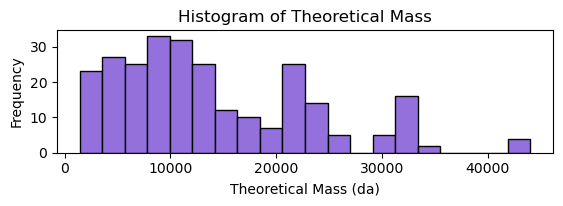

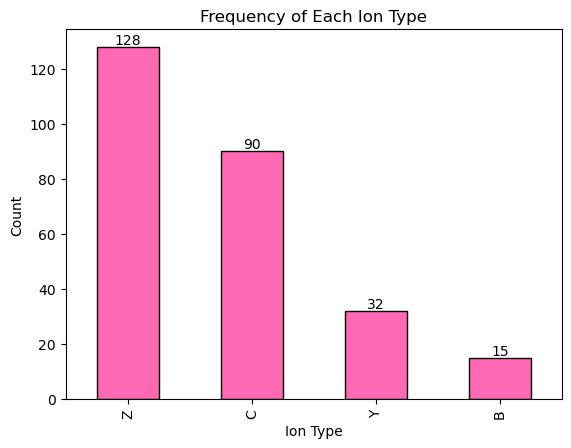

In [3]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from pandas import ExcelWriter
import re

def upload_excel():
    global df, ax, canvas, fig_histogram, fig_ion_count
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])

    if file_path:
        # Read the selected Excel file into a Pandas DataFrame.
        df = pd.read_excel(file_path)

        # Check if a figure exists and clear it if it does.
        if fig_histogram:
            fig_histogram.clear()

def create_histogram():
    global ax, canvas, fig_histogram
    if 'Theoretical Mass' in df:
        # Filter rows where the "Active" column is 'True'.
        df_filtered = df[df['Active'] == True]

        # Create a histogram based on the "Theoretical Mass" column.
        if not fig_histogram:
            fig_histogram, ax = plt.subplots()
        ax.hist(df_filtered['Theoretical Mass'], bins=20, color='mediumpurple', edgecolor='black')
        ax.set_title('Histogram of Theoretical Mass')
        ax.set_xlabel('Theoretical Mass (da)')
        ax.set_ylabel('Frequency')
        
        # Save the histogram as a PDF
        fig_histogram.savefig('histogram.pdf', format='pdf')

        # Embed the Matplotlib figure in the Tkinter window
        if not canvas:
            canvas = FigureCanvasTkAgg(fig_histogram, master=root)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack()

            canvas.draw()
    else:
        print("Theoretical Mass column not found in the DataFrame.")

def filter_and_export():
    if 'Theoretical Mass' in df and 'Name' in df:
        # Filter rows where the "Active" column is 'True'.
        df_filtered = df[df['Active'] == True]

        # Sort the filtered data by the "Name" column
        df_filtered = df_filtered.sort_values(by='Name')

        # Group the data by the first letter of the "Name" column
        grouped_data = df_filtered.groupby(df_filtered['Name'].str[0])

        # Create an ExcelWriter to save the data to an Excel file
        file_path = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Excel files", "*.xlsx")])
        if file_path:
            with ExcelWriter(file_path, engine="openpyxl") as writer:
                for group_name, group_data in grouped_data:
                    # Save each group as a separate sheet with the first letter as the sheet name
                    group_data.to_excel(writer, index=False, sheet_name=group_name)
    else:
        print("Theoretical Mass or Name column not found in the DataFrame.")

def count_names_starting_with():
    global ax, canvas, fig_histogram  # Define ax, canvas, fig_histogram, and fig_ion_count as global variables
    if 'Name' in df:
        # Filter rows where the "Active" column is 'True'.
        df_filtered = df[df['Active'] == True].copy()

        # Get the counts of names starting with "B", "Y", "C", or "Z"
        counts = df_filtered['Name'].str[0].value_counts()

        # Display the counts
        name_counts_label.config(text=f"Counts: {counts}")

        # Embed the Matplotlib figure in the Tkinter window
        if not canvas:
            canvas = FigureCanvasTkAgg(fig_histogram, master=root)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack()

            canvas.draw()
    else:
        print("Name column not found in the DataFrame.")

def create_ion_type_bar_graph():
    global ax, canvas, fig_histogram, fig_ion_count  # Define ax, canvas, fig_histogram, and fig_ion_count as global variables
    if 'Name' in df:
        # Filter rows where the "Active" column is 'True'.
        df_filtered = df[df['Active'] == True].copy()

        # Extract the first letter from each entry in the "Name" column
        df_filtered['FirstLetter'] = df_filtered['Name'].str.extract(r'([A-Z])', expand=False)

        # Count the extracted first letters
        counts = df_filtered['FirstLetter'].value_counts()

        # Display the counts
        ion_type_counts_label.config(text=f"Ion Type Counts: {counts}")

        # Create a bar graph for ion count based on the "Name" column from the Excel sheet
        if not fig_ion_count:
            fig_ion_count, ax = plt.subplots()
            counts.plot(kind='bar', ax=ax, color='hotpink', edgecolor='black')
            ax.set_title('Frequency of Each Ion Type')
            ax.set_xlabel('Ion Type')
            ax.set_ylabel('Count')

            # Add data labels above the bars
            for i, count in enumerate(counts):
                ax.text(i, count, str(count), ha='center', va='bottom')

        # Save the bar graph as a PDF
        fig_ion_count.savefig('ion_count.pdf', format='pdf')

        # Embed the Matplotlib figure in the Tkinter window
        if not canvas:
            canvas = FigureCanvasTkAgg(fig_ion_count, master=root)
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack()

            canvas.draw()
    else:
        print("Ion Type column not found in the DataFrame.")


def clear_filtered_data():
    filtered_data_text.delete(1.0, tk.END)

# Create a GUI window
root = tk.Tk()
root.title("Excel File Upload, Histogram, and Data Export")

df = None
ax = None
canvas = None
fig_histogram = None
fig_ion_count = None

# Create buttons for uploading the Excel file, creating the histogram, and exporting filtered data
upload_button = tk.Button(root, text="Upload Excel File", command=upload_excel)
upload_button.pack(pady=10)

histogram_button = tk.Button(root, text="Create Histogram", command=create_histogram)
histogram_button.pack(pady=10)

count_button = tk.Button(root, text="Count Names", command=count_names_starting_with)
count_button.pack(pady=10)

ion_type_button = tk.Button(root, text="Show Ion Type Counts", command=create_ion_type_bar_graph)
ion_type_button.pack(pady=10)

filter_export_button = tk.Button(root, text="Filter and Export Data", command=filter_and_export)
filter_export_button.pack(pady=10)

clear_button = tk.Button(root, text="Clear Filtered Data", command=clear_filtered_data)
clear_button.pack(pady=10)

# Create a label to display ion type ("name") counts
ion_type_counts_label = tk.Label(root, text="Ion Type Counts: ")
ion_type_counts_label.pack()

# Create a Text widget to display filtered data
filtered_data_text = tk.Text(root, height=10, width=50)
filtered_data_text.pack(pady=10)

# Create a label to display name counts
name_counts_label = tk.Label(root, text="Counts: ")
name_counts_label.pack()

# Start the GUI application
root.mainloop()
